# Data Analysis

This notebook allows to gain insight in both used dataset `tweet.zip` and `BTC-TUSD.parquet`.

In [1]:
from data_analysis import TweetsAnalyzer, BTCAnalyzer
import pandas as pd
%load_ext autoreload
%autoreload 2

## BTC

We start by looking at the `BTC-TUSD.parquet` dataset. First we load the file.

In [2]:
price = BTCAnalyzer(file_path='./data/BTC-USDT.parquet')
price.data

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2017-08-17 04:00:00,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,7.564907e+03,3,0.075183,320.390839
2017-08-17 04:01:00,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0.000000e+00,0,0.000000,0.000000
2017-08-17 04:02:00,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,1.117543e+03,2,0.261074,1117.542969
2017-08-17 04:03:00,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,5.117185e+01,3,0.012008,51.171852
2017-08-17 04:04:00,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,5.999993e+02,1,0.140796,599.999329
...,...,...,...,...,...,...,...,...,...
2022-11-16 23:55:00,16672.869141,16675.460938,16665.580078,16667.230469,47.899929,7.984622e+05,1523,22.106960,368517.281250
2022-11-16 23:56:00,16666.060547,16676.900391,16662.439453,16675.179688,86.314827,1.438798e+06,2169,47.286331,788269.250000
2022-11-16 23:57:00,16675.179688,16678.980469,16665.539062,16671.490234,85.274879,1.421645e+06,2066,41.849972,697719.312500


We can now plot the whole dataset.

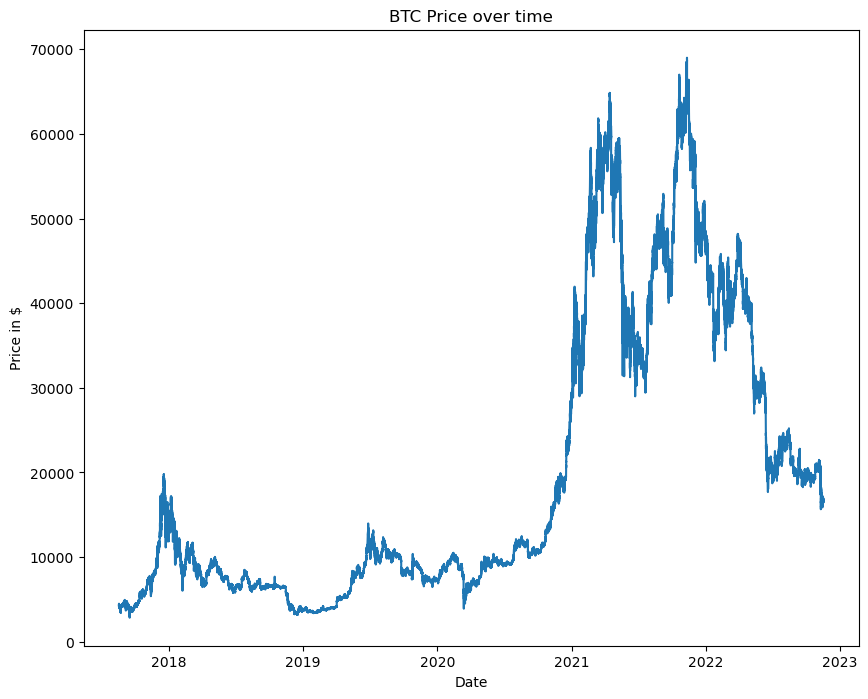

In [3]:
price_change = price.plot_price()

Since we are making our analysis in a specific time window, we need to chunk the dataset to only keep the wanted information.

In [4]:
print(price.data.shape)
price.data = price.data.reset_index()
price.data.loc[[0, 2753181], "open_time"]

(2753182, 9)


0         2017-08-17 04:00:00
2753181   2022-11-16 23:59:00
Name: open_time, dtype: datetime64[ns]

In [5]:
price.data["open_time"].dtype

dtype('<M8[ns]')

In [32]:
price.data["open_time"] =  pd.to_datetime(price.data["open_time"]).dt.tz_localize('UTC')
price.data = price.data.sort_values(by='open_time', ascending=True)
price.data

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-08-17 04:00:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,7.564907e+03,3,0.075183,320.390839
1,2017-08-17 04:01:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0.000000e+00,0,0.000000,0.000000
2,2017-08-17 04:02:00+00:00,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,1.117543e+03,2,0.261074,1117.542969
3,2017-08-17 04:03:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,5.117185e+01,3,0.012008,51.171852
4,2017-08-17 04:04:00+00:00,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,5.999993e+02,1,0.140796,599.999329
...,...,...,...,...,...,...,...,...,...,...
2753177,2022-11-16 23:55:00+00:00,16672.869141,16675.460938,16665.580078,16667.230469,47.899929,7.984622e+05,1523,22.106960,368517.281250
2753178,2022-11-16 23:56:00+00:00,16666.060547,16676.900391,16662.439453,16675.179688,86.314827,1.438798e+06,2169,47.286331,788269.250000
2753179,2022-11-16 23:57:00+00:00,16675.179688,16678.980469,16665.539062,16671.490234,85.274879,1.421645e+06,2066,41.849972,697719.312500
2753180,2022-11-16 23:58:00+00:00,16670.240234,16675.949219,16668.730469,16674.310547,56.534920,9.425971e+05,1605,31.080429,518212.093750


## Tweets

We can now have a look at the `tweets.zip` file.

In [7]:
tweets = TweetsAnalyzer(file_path='data/tweets.csv.zip')

17chunks [04:08, 14.62s/chunks]                    


In [8]:
tweets.data

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.132977e+18,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1.132977e+18,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,1.132977e+18,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...
3,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1.132977e+18,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
...,...,...,...,...,...,...,...,...,...
16889760,1.198262e+18,JacobCanfield,Jacob Canfield,NaN,2019-11-23 15:28:50+00,2,16,3,Happy #FibonacciDay \n\nA while back I created...
16889761,1.198266e+18,Vizique,Vizique,NaN,2019-11-23 15:45:55+00,0,0,0,Bitcoin Suisse Certificates :) https://t.co/nd...
16889762,1.198266e+18,torusJKL,Gal Buki ($torusJKL),NaN,2019-11-23 15:45:56+00,0,0,0,Register now for the early access of the Codug...
16889763,1.198266e+18,Adekunl95628158,Adekunle Daniel,NaN,2019-11-23 15:45:57+00,0,0,0,@btc \n@btc \nDo you know that BTC Baskets isn...


In [9]:
print(tweets.data.shape)
tweets.data.loc[[0, 16889764], "timestamp"]

(16889765, 9)


0           2019-05-27 11:49:14+00
16889764    2019-11-23 15:45:06+00
Name: timestamp, dtype: object

In [10]:
tweets.data["timestamp"].dtype

dtype('O')

In [11]:
tweets.data['timestamp'] = pd.to_datetime(tweets.data['timestamp'])
tweets.data = tweets.data.sort_values(by='timestamp', ascending=True)
tweets.data

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
11291156,3.286741e+07,chrispychong,chrispy,NaN,2007-04-19 07:14:38+00:00,0,0,2,is happily mugging at BTC where she will hook ...
21,1.110303e+09,halfin,halfin,NaN,2009-01-11 03:33:52+00:00,790,14470,5542,Running bitcoin\r
5164467,1.136750e+09,halfin,halfin,NaN,2009-01-21 17:29:40+00:00,55,1544,392,Looking at ways to add more anonymity to bitco...
5210398,1.153097e+09,halfin,halfin,NaN,2009-01-27 20:14:10+00:00,44,1042,277,Thinking about how to reduce CO2 emissions fro...
5269667,1.158417e+09,fafcffacfff,GoldLover,NaN,2009-01-29 13:37:53+00:00,0,28,16,From: Satoshi Nakamoto - 2009-01-11 22:32 Bitc...
...,...,...,...,...,...,...,...,...,...
16889757,1.198266e+18,theautomatski,Automatski,NaN,2019-11-23 15:45:53+00:00,0,0,0,The Worlds First Millennium Firm https://t.co/...
16889759,1.198266e+18,digital_mine_,digital mine ⚡🤖👨‍💻🇭🇰🇭🇰🇭🇰,NaN,2019-11-23 15:45:55+00:00,0,0,0,Daily profit for HODLING BTC since 2013 Data t...
16889761,1.198266e+18,Vizique,Vizique,NaN,2019-11-23 15:45:55+00:00,0,0,0,Bitcoin Suisse Certificates :) https://t.co/nd...
16889762,1.198266e+18,torusJKL,Gal Buki ($torusJKL),NaN,2019-11-23 15:45:56+00:00,0,0,0,Register now for the early access of the Codug...


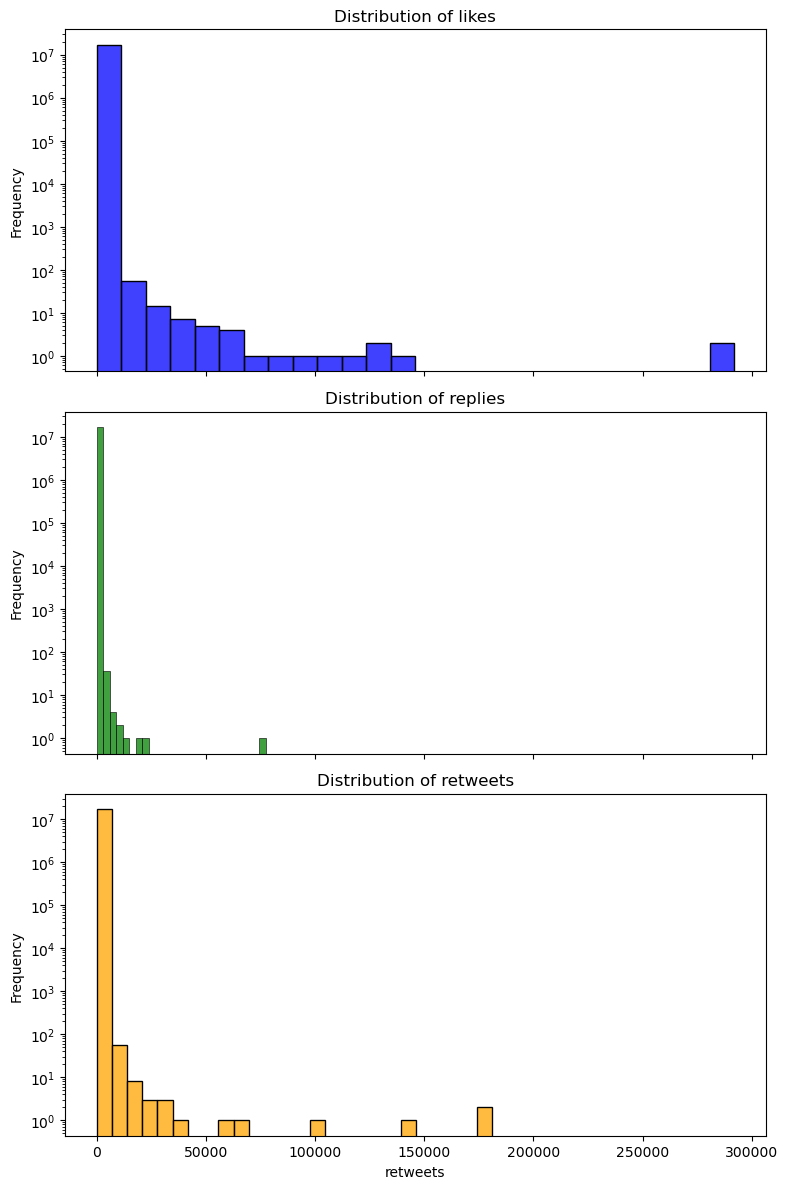

In [12]:
metrics_stats = tweets.performance_distribution()

We only keep the tweets in the tweets in the same time window as the BTC dataset.

The rest of the tweets can be used to check how influencial a user is.

In [37]:
start = price.data.loc[0, "open_time"]
end = tweets.data.iloc[-1]["timestamp"]
filtered_prices = price.data[(price.data['open_time']>=start) & (price.data['open_time']<=end)]
filtered_tweets = tweets.data[(tweets.data['timestamp']>=start) & (tweets.data['timestamp']<=end)]

In [42]:
print("We are lefet with BTC-USDT prices from",filtered_prices['open_time'].min(),"to",filtered_prices['open_time'].max())

We are lefet with BTC-USDT prices from 2017-08-17 04:00:00+00:00 to 2019-11-23 15:45:00+00:00


In [43]:
print("We are lefet with BTC Tweets from",filtered_tweets['timestamp'].min(),"to",filtered_tweets['timestamp'].max())

We are lefet with BTC Tweets from 2017-08-17 04:00:01+00:00 to 2019-11-23 15:45:57+00:00


In [67]:
interval_in_days = filtered_tweets['timestamp'].max()-filtered_tweets['timestamp'].min()
interval_in_years = round(interval_in_days.days/365, 2)
print("We are working with a time interval of", interval_in_days.days,"days or, equivalently,", interval_in_years,"years")

We are working with a time interval of 828 days or, equivalently, 2.27 years
